In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
# Cargar el dataset Fashion-MNIST
datos, metadatos = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
datos_entrenamiento, datos_pruebas = datos["train"], datos["test"]

nombres_clases = metadatos.features["label"].names

In [ ]:
# Función de normalización
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32) / 255.0
    return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar).cache()
datos_pruebas = datos_pruebas.map(normalizar).cache()

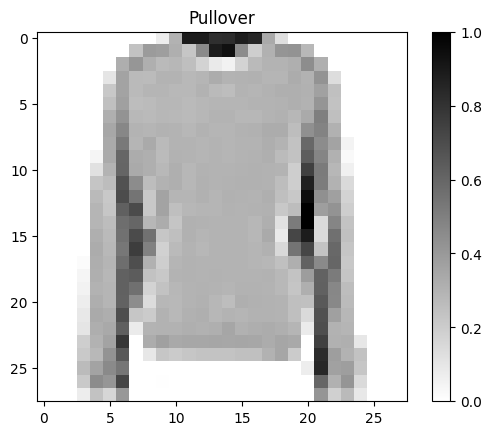

In [ ]:
# Visualizar un ejemplo
for imagen, etiqueta in datos_entrenamiento.take(1):
    break

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.title(nombres_clases[etiqueta])
plt.show()

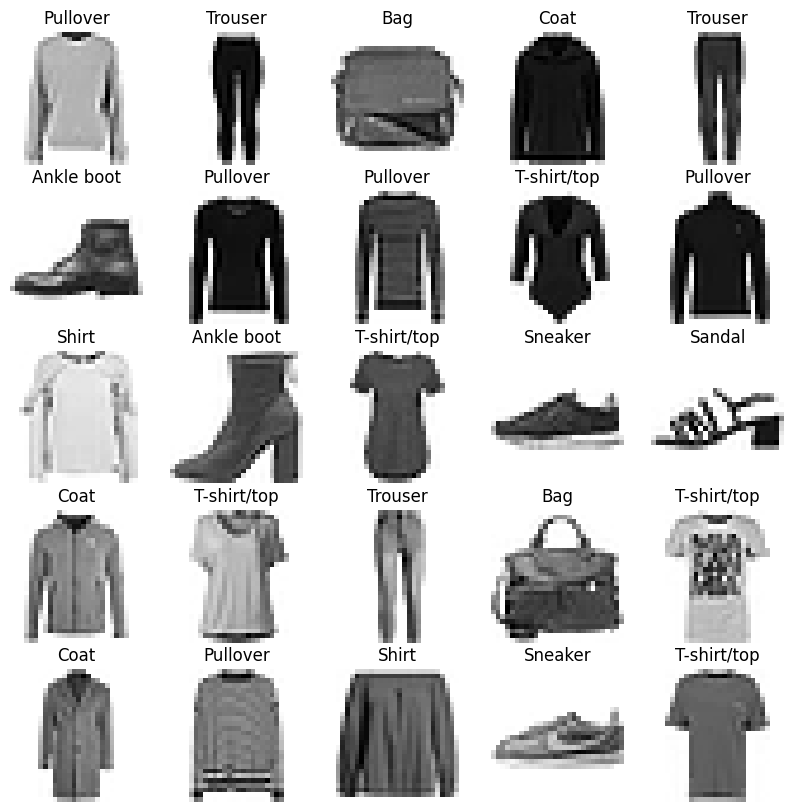

In [ ]:
# Mostrar 25 imágenes de entrenamiento
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    plt.subplot(5, 5, i+1)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(nombres_clases[etiqueta])
plt.show()

In [ ]:
# Crear modelo CNN
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
# Compilar modelo
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [ ]:
# Preparar datos por lotes
TAMANO_LOTE = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(60000).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [ ]:
# Entrenar el modelo
modelo.fit(
    datos_entrenamiento, epochs=12,
    steps_per_epoch=math.ceil(60000 / TAMANO_LOTE)
)

Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.8538 - loss: 0.4025
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8926 - loss: 0.2960
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9081 - loss: 0.2534
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9180 - loss: 0.2215
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9264 - loss: 0.1989
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9324 - loss: 0.1838
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9406 - loss: 0.1581
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9472 - loss: 0.1442
Epoch 9/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9528 - loss: 0.1262
Epoch 10/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9572 - loss: 0.1125
Epoch 11/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9606 - loss: 0.1042
Epoch 12

In [ ]:
# Evaluar y mostrar predicciones
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
    imagenes_prueba = imagenes_prueba.numpy()
    etiquetas_prueba = etiquetas_prueba.numpy()
    predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[..., 0], cmap=plt.cm.binary)
    etiqueta_prediccion = np.argmax(arr_predicciones)
    color = "blue" if etiqueta_prediccion == etiqueta_real else "red"
    plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                         100*np.max(arr_predicciones),
                                         nombres_clases[etiqueta_real]),
               color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predicciones, color="#777777")
    plt.ylim([0, 1])
    etiqueta_prediccion = np.argmax(arr_predicciones)
    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_real].set_color('blue')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


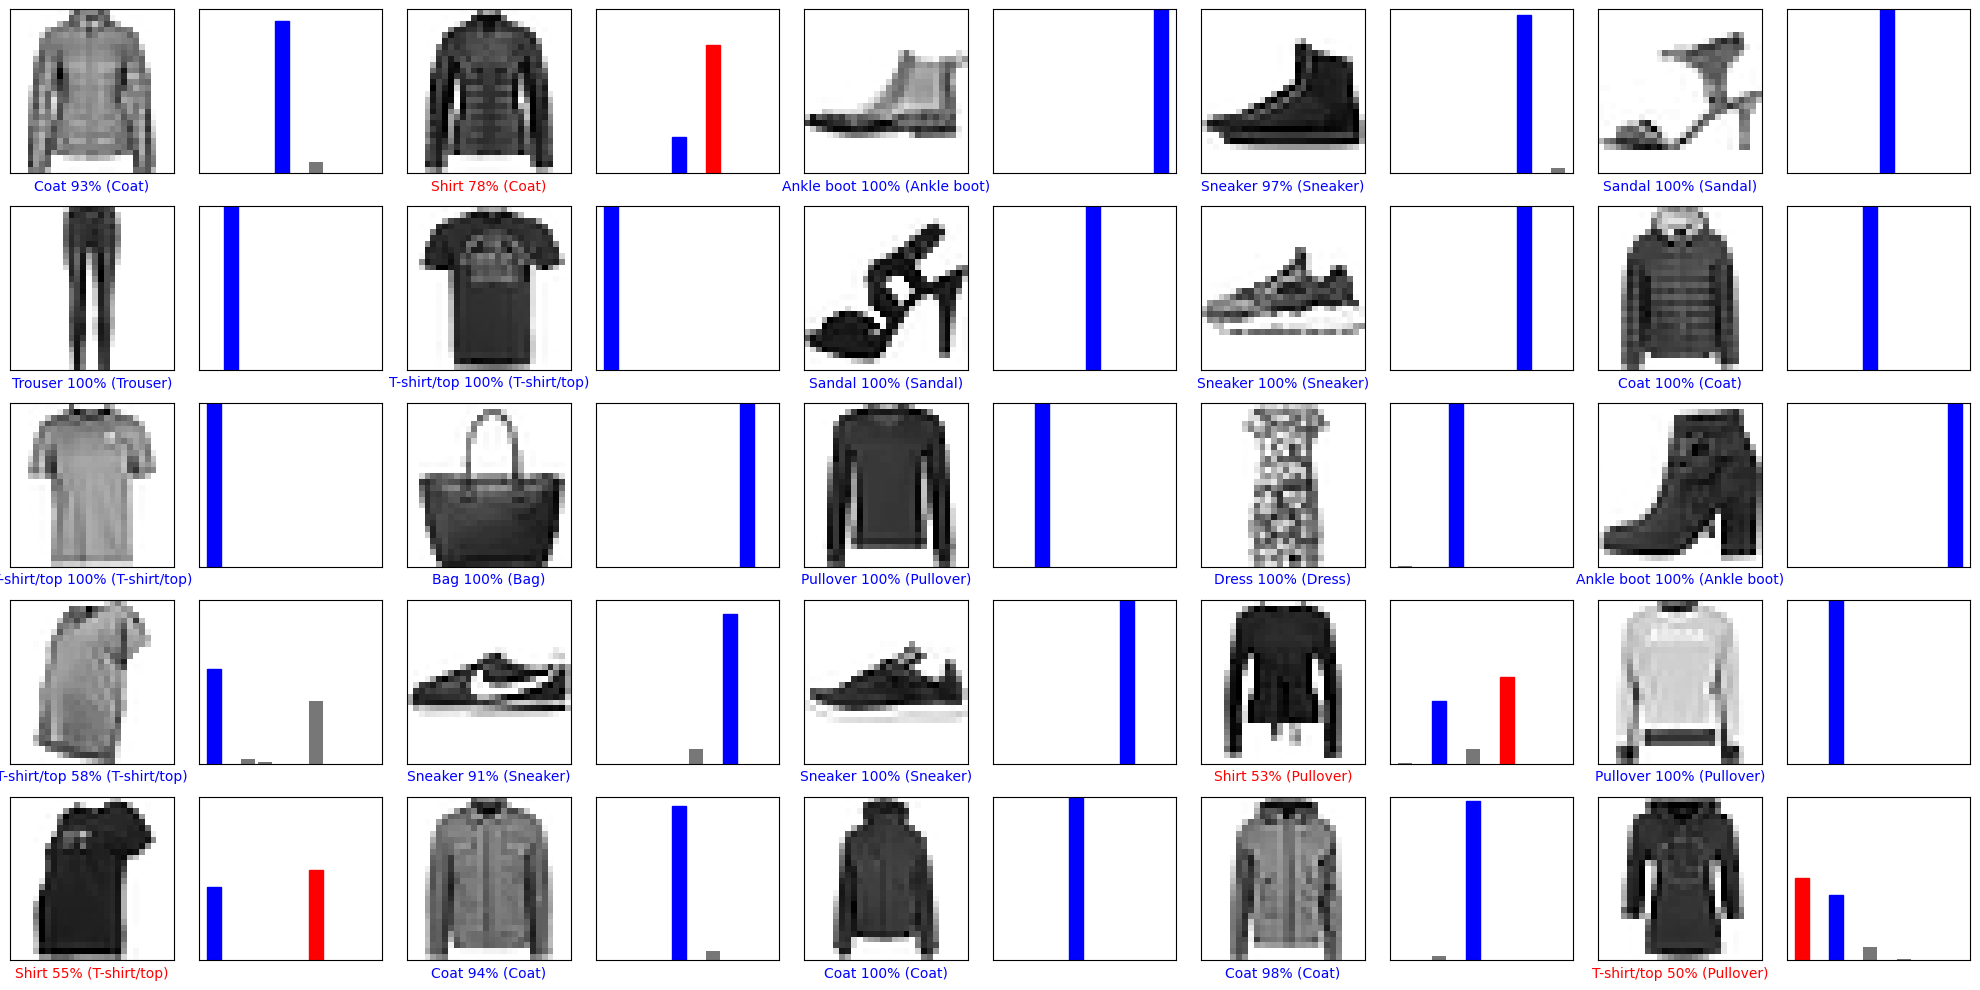

In [ ]:
# Mostrar 25 imágenes con predicciones
filas = 5
columnas = 5
num_imagenes = filas * columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
    plt.subplot(filas, 2*columnas, 2*i+1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
    plt.subplot(filas, 2*columnas, 2*i+2)
    graficar_valor_arreglo(i, predicciones, etiquetas_prueba)
plt.tight_layout()
plt.show()